In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

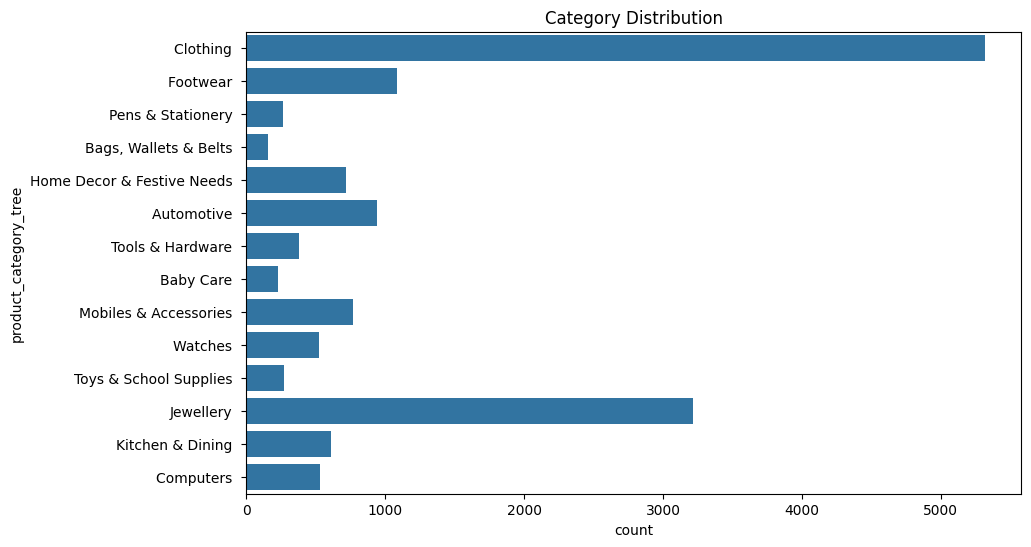

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."


In [2]:
# Load dataset
data = pd.read_csv('train_product_data.csv')  # Replace with your dataset path

# Display basic information
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='product_category_tree', data=data)
plt.title('Category Distribution')
plt.show()
data.head(2)

In [3]:

df = data[['description','product_category_tree']]

In [4]:
print(df.head(2))

print(df.isnull().sum())



                                         description product_category_tree
0  Key Features of Alisha Solid Women's Cycling S...             Clothing 
1  Key Features of AW Bellies Sandals Wedges Heel...             Footwear 
description              1
product_category_tree    0
dtype: int64


In [5]:
df['description'].fillna(df['description'].mode()[0], inplace = True )

<ipython-input-5-f229428f71f9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna(df['description'].mode()[0], inplace = True )
<ipython-input-5-f229428f71f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'].fillna(df['description'].mode()[0], inplace = True )


In [6]:
df['product_category_tree'].value_counts()

,count
product_category_tree,
Clothing,5316
Jewellery,3218
Footwear,1083
Automotive,937
Mobiles & Accessories,768
Home Decor & Festive Needs,714
Kitchen & Dining,610
Computers,531
Watches,526


In [7]:
#vizuvalition Path
path = "C:/Users/dell/Downloads"

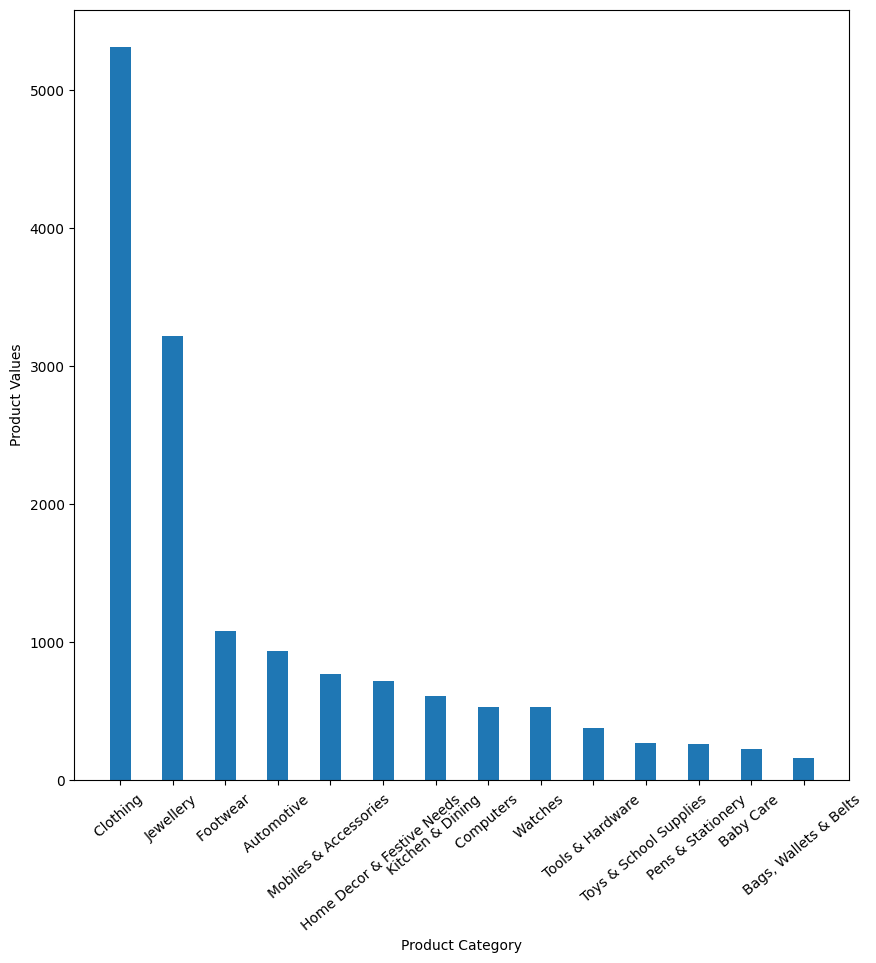

In [8]:
import matplotlib.pyplot as plt
import os
label = df['product_category_tree'].value_counts().to_dict()
# Visualization
plt.figure(figsize=(10, 10))
ax = plt.bar(label.keys(), label.values(), width = 0.40)
plt.xticks(rotation = 40)
plt.xlabel('Product Category')
plt.ylabel('Product Values')

# Define the folder path to save the visualization
folder_path = path  # Replace with your desired folder path
os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot
file_name = 'product_distribution.png'
full_path = os.path.join(folder_path, file_name)
plt.savefig(full_path, dpi=300)

# Show the plot
plt.show()



In [11]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


# Splitting features and target
X = df[['description']]
y = df['product_category_tree']


# Applying Random Over Sampling
ros = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(X, y)
#combine both values
df_resampled = X_resampled.copy()
df_resampled['product_category_tree'] = y_resampled
#check the values
print(df_resampled['product_category_tree'].value_counts())





product_category_tree
Clothing                       5316
Footwear                       5316
Pens & Stationery              5316
Bags, Wallets & Belts          5316
Home Decor & Festive Needs     5316
Automotive                     5316
Tools & Hardware               5316
Baby Care                      5316
Mobiles & Accessories          5316
Watches                        5316
Toys & School Supplies         5316
Jewellery                      5316
Kitchen & Dining               5316
Computers                      5316
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [12]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74424 entries, 0 to 74423
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            74424 non-null  object
 1   product_category_tree  74424 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


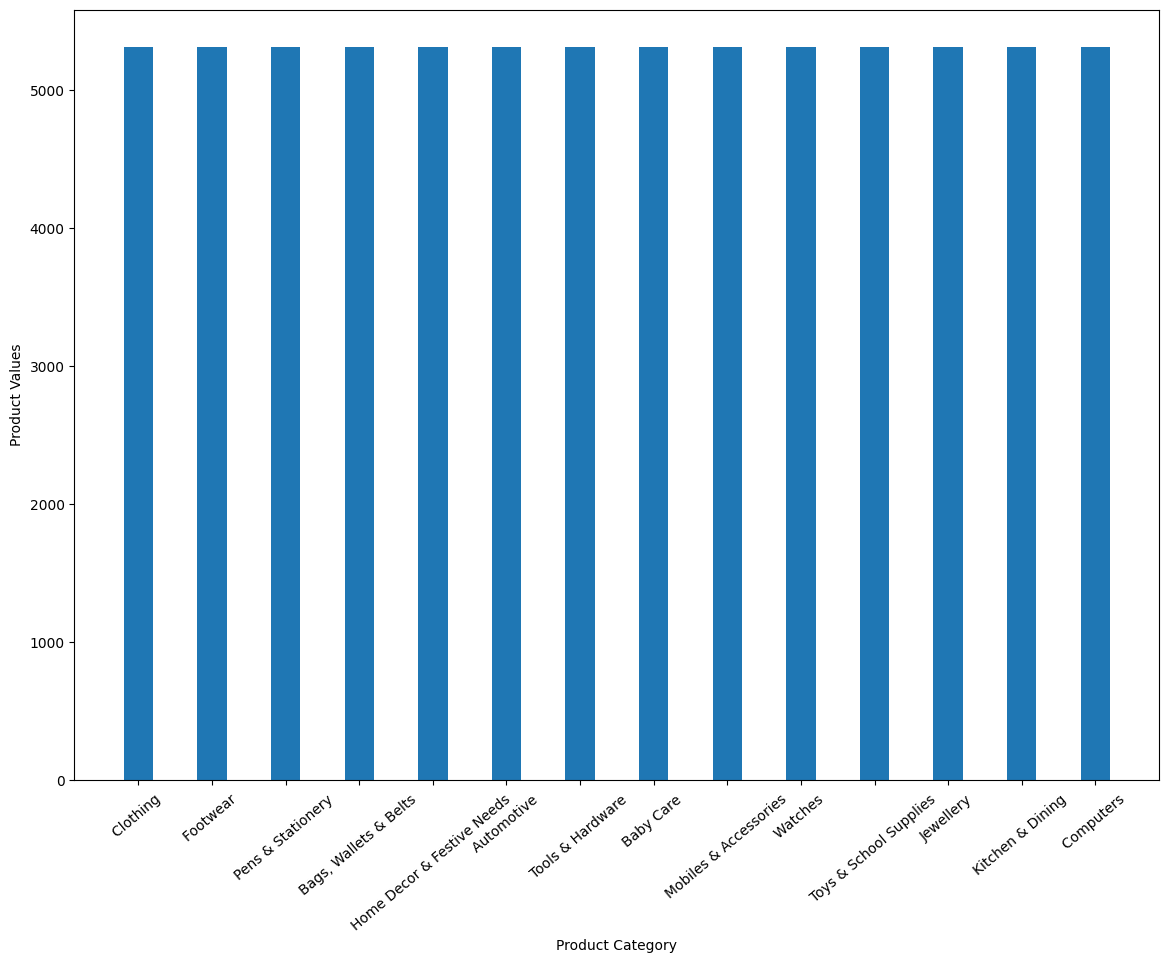

In [13]:
label = df_resampled['product_category_tree'].value_counts().to_dict()
# Visualization
plt.figure(figsize=(14, 10))
ax = plt.bar(label.keys(), label.values(), width = 0.40)
plt.xticks(rotation = 40)
plt.xlabel('Product Category')
plt.ylabel('Product Values')

# Define the folder path to save the visualization
folder_path = path  # Replace with your desired folder path
os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot
file_name = 'resample_product_distribution.png'
full_path = os.path.join(folder_path, file_name)
plt.savefig(full_path)

# Show the plot
plt.show()


In [14]:
df.head(3)

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing


In [15]:
df_resampled.isnull().sum()

,0
description,0
product_category_tree,0


In [16]:
import nltk
from nltk.corpus import stopwords
import re
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing
df_resampled['clean_description'] = df_resampled['description'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Removing duplicate records:

df_resampled['clean_description'].drop_duplicates(inplace=True)

In [18]:
df_resampled['clean_description'].duplicated().sum()

63375

In [18]:

import pandas as pd
import re
from nltk.corpus import stopwords

# Ensure you have downloaded stopwords from nltk
# import nltk
# nltk.download('stopwords')

# Define stopwords set
STOPWORDS = set(stopwords.words("english"))

# Function to clean content (text)
def text_clean(content):
    # Convert text to lowercase
    content = content.lower()

    # Remove mentions (e.g., @username)
    content = re.sub(r"@[A-Za-z0-9]+", "", content)

    # Remove hashtags (e.g., #hashtag)
    content = re.sub(r"#[A-Za-z0-9]+", "", content)

    # Remove URLs (http, https)
    content = re.sub(r"http\s+|https\s+", "", content)

    # Remove non-alphanumeric characters (except spaces)
    content = re.sub(r"[^a-z0-9\s]", "", content)

    # Remove stopwords
    content = ' '.join(word for word in content.split() if word not in STOPWORDS)

    return content

# Apply the text_clean function to the 'description' column and store in 'clean_description'
df_resampled['clean_description'] = df_resampled['description'].apply(text_clean)


In [20]:

import pandas as pd
import re

def remove_duplicate_words(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space and strip leading/trailing spaces

    # Split the text into words
    words = text.split()

    # Remove duplicate words while preserving order
    unique_words = []
    seen = set()
    for word in words:
        if word not in seen:
            seen.add(word)
            unique_words.append(word)

    # Join the unique words back into a single string
    return ' '.join(unique_words)


# Apply the function to remove duplicate words
df_resampled['clean_description'] = df_resampled['clean_description'].apply(remove_duplicate_words)

# Display the cleaned DataFrame
print(df_resampled['clean_description'])

0        key features alisha solid womens cycling short...
1        key features aw bellies sandals wedges heel ca...
2        key features alisha solid womens cycling short...
3        key features alisha solid womens cycling short...
4        key features dilli bazaaar bellies corporate c...
                               ...                        
74419    key features sakhi styles boys men material le...
74420    franck bella fbc analog watch boys men buy onl...
74421    like steel gold hbg analog watch girls women b...
74422    positif pfbk analog watch men boys buy online ...
74423    disney msfrb analog watch boys girls buy onlin...
Name: clean_description, Length: 74424, dtype: object


In [21]:
# Calculate the length of the cleaned text and add it as a new column
df_resampled['text_length'] = df_resampled['clean_description'].apply(lambda x: len(x.split(' ')))
#df_resampled['text_length_description'] = df_resampled['description'].apply(lambda x: len(x.split(' ')))


In [22]:
#df_resampled = df.drop(columns=['text_length1'], axis=0)
#df_resampled['text_length1'].drop()
df_resampled[['clean_description','product_category_tree']].head()
#print(df_resampled.columns)
#df_resampled = df.drop(columns=['cleaned_description'], errors='ignore')

,clean_description,product_category_tree
0,key features alisha solid womens cycling short...,Clothing
1,key features aw bellies sandals wedges heel ca...,Footwear
2,key features alisha solid womens cycling short...,Clothing
3,key features alisha solid womens cycling short...,Clothing
4,key features dilli bazaaar bellies corporate c...,Footwear


In [23]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_resampled['clean_description'], df_resampled['product_category_tree'], test_size=0.2, stratify=df_resampled['product_category_tree'])

In [24]:
print(y_train.shape[0],X_test.shape[0])

59539 14885


In [44]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [25]:
import nltk
nltk.download('punkt_tab')
train_X = [nltk.word_tokenize(discription.lower()) for discription in X_train ]
test_X = [nltk.word_tokenize(discription.lower()) for discription in X_test ]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [26]:
train_X

[['key',
  'features',
  'generix',
  'otg',
  'honor',
  'x',
  'cable',
  'android',
  'upper',
  'verson',
  'supports',
  'note',
  'totally',
  'depends',
  'phone',
  'support',
  'guarntee',
  'smart',
  'phones',
  'function',
  'please',
  'check',
  'ur',
  'device',
  'comatiblity',
  'buying',
  'happy',
  'generixgenerix',
  'white',
  'price',
  'rs',
  'generixrelated',
  'video',
  'cablespecifications',
  'box',
  'number',
  'contents',
  'sales',
  'package',
  'micro',
  'usb',
  'supported',
  'mobile',
  'general',
  'brand',
  'suitable',
  'smartphones',
  'tablet',
  'type',
  'high',
  'speed',
  'mbps',
  'model',
  'length',
  'compatible',
  'devices',
  'round',
  'part',
  'otgwhite',
  'connector',
  'color',
  'warranty',
  'covered',
  'product',
  'limited',
  'manufacturing',
  'defects',
  'summary',
  'month',
  'india',
  'warranry',
  'service',
  'replacement',
  'cover',
  'external',
  'accessories',
  'battery',
  'carrying',
  'bag',
  'dama

In [27]:
print(y_train.value_counts())

product_category_tree
Mobiles & Accessories          4253
Jewellery                      4253
Tools & Hardware               4253
Kitchen & Dining               4253
Computers                      4253
Baby Care                      4253
Footwear                       4253
Toys & School Supplies         4253
Pens & Stationery              4253
Automotive                     4253
Watches                        4253
Bags, Wallets & Belts          4252
Clothing                       4252
Home Decor & Festive Needs     4252
Name: count, dtype: int64


In [28]:
# Step 1: Install gensim if not already installed
!pip install gensim

# Step 2: Import necessary libraries
import gensim
from gensim.models import Word2Vec
word2vec_model = Word2Vec(train_X, vector_size=180, window=4, min_count=1, workers=4)


In [29]:
import numpy as np

def get_average_word2vec(sentence, model, vector_size):
    # Filter words that exist in the Word2Vec model's vocabulary
    words = [word for word in sentence if word in model.wv.key_to_index]

    # If there are no valid words, return a zero vector of the specified size
    if len(words) == 0:
        return np.zeros(vector_size)

    # Calculate the mean of the Word2Vec vectors for the words in the sentence
    return np.mean([model.wv[word] for word in words], axis=0)

# Example usage:
train_vectors = np.array([get_average_word2vec(sentence, word2vec_model, vector_size=180) for sentence in train_X])
test_vectors = np.array([get_average_word2vec(sentence, word2vec_model, vector_size=100) for sentence in test_X])


In [30]:
X_train_vectors = np.array(train_vectors)
X_test_vectors = np.array(test_vectors)

Training Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Cross-validation mean score for Random Forest: 0.9583


<ipython-input-35-f7596eb7c681>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_card = pd.concat([score_card, pd.DataFrame({


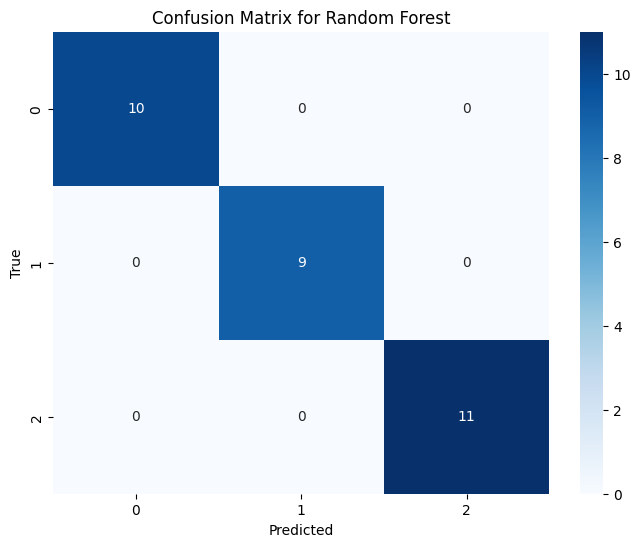

Training Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'saga'}
Cross-validation mean score for Logistic Regression: 0.9583


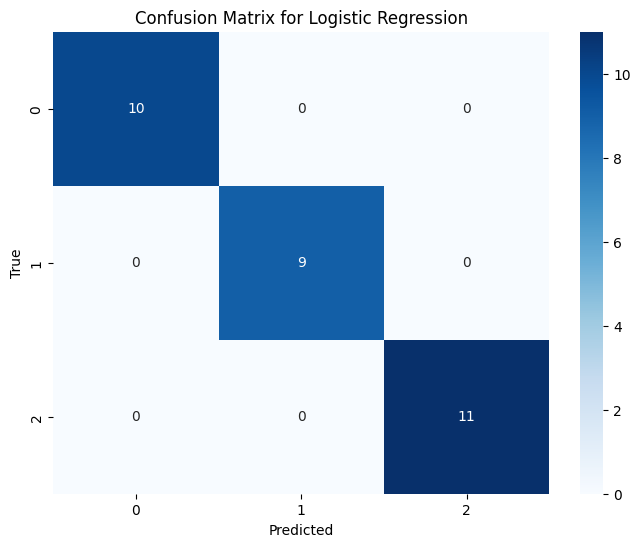

            model_name  Accuracy Score  Precision Score  Recall Score  \
0        Random Forest             1.0              1.0           1.0   
1  Logistic Regression             1.0              1.0           1.0   

   F1 Score  
0       1.0  
1       1.0  


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load a sample dataset (Iris dataset for simplicity)
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for models like SVM, KNN)
scaler = StandardScaler()
X_train_vectors = scaler.fit_transform(X_train)
X_test_vectors = scaler.transform(X_test)

# Create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['model_name', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])

# Function to update the scorecard
def update_score_card(y_test, y_pred, model_name):
    global score_card  # Declare score_card as a global variable

    # Append the results to the dataframe 'score_card'
    score_card = pd.concat([score_card, pd.DataFrame({
        'model_name': [model_name],
        'Accuracy Score': [accuracy_score(y_test, y_pred)],
        'Precision Score': [precision_score(y_test, y_pred, average='weighted')],
        'Recall Score': [recall_score(y_test, y_pred, average='weighted')],
        'F1 Score': [f1_score(y_test, y_pred, average='weighted')]
    })], ignore_index=True)

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Define hyperparameter grids for GridSearchCV (for first two models)
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 1000]
    }
}

# List of classifiers to evaluate (first two models)
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Iterate over each classifier, perform hyperparameter tuning and cross-validation
for model_name, model in classifiers.items():
    print(f"Training {model_name}...")

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_vectors, y_train)

    # Get the best model after GridSearchCV
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Cross-validation score (5-fold cross-validation)
    cv_scores = cross_val_score(best_model, X_train_vectors, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation mean score for {model_name}: {cv_scores.mean():.4f}")

    # Train the best model on the whole training data
    best_model.fit(X_train_vectors, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test_vectors)

    # Update the scorecard
    update_score_card(y_test, y_pred, model_name)

    # Plot confusion matrix for each model
    plot_confusion_matrix(y_test, y_pred, model_name)

# To see the updated score card with the performance metrics:
print(score_card)

Training Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Cross-validation mean score for Support Vector Machine: 0.9583


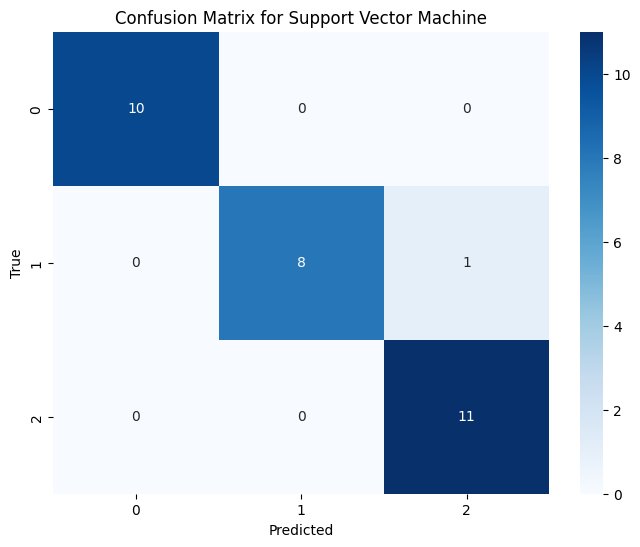

Training Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation mean score for Decision Tree: 0.9500


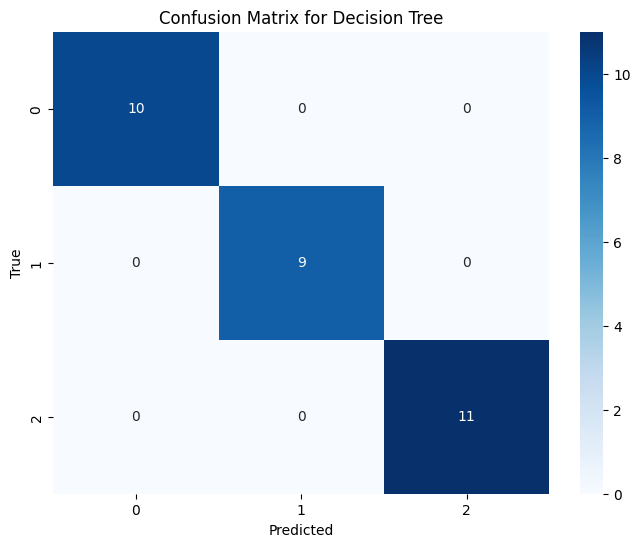

               model_name  Accuracy Score  Precision Score  Recall Score  \
0           Random Forest        1.000000         1.000000      1.000000   
1     Logistic Regression        1.000000         1.000000      1.000000   
2  Support Vector Machine        0.966667         0.969444      0.966667   
3           Decision Tree        1.000000         1.000000      1.000000   

   F1 Score  
0  1.000000  
1  1.000000  
2  0.966411  
3  1.000000  


In [36]:
# Define hyperparameter grids for GridSearchCV (for second two models)
param_grids = {
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# List of classifiers to evaluate (second two models)
classifiers = {
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Iterate over each classifier, perform hyperparameter tuning and cross-validation
for model_name, model in classifiers.items():
    print(f"Training {model_name}...")

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_vectors, y_train)

    # Get the best model after GridSearchCV
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Cross-validation score (5-fold cross-validation)
    cv_scores = cross_val_score(best_model, X_train_vectors, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation mean score for {model_name}: {cv_scores.mean():.4f}")

    # Train the best model on the whole training data
    best_model.fit(X_train_vectors, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test_vectors)

    # Update the scorecard
    update_score_card(y_test, y_pred, model_name)

    # Plot confusion matrix for each model
    plot_confusion_matrix(y_test, y_pred, model_name)

# To see the updated score card with the performance metrics:
print(score_card)